In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds


# Step 1: Load MovieLens 100k data from file or URL
url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(url, sep='\t', names=column_names)

# Create a pivot table (user-item matrix) for ratings
ratings_matrix = df.pivot(index='user_id', columns='item_id', values='rating')
 

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds
 
# Step 3: Identify non-NA entries in the ratings matrix
non_na_mask = ratings_matrix.notna()

# Convert mask to a list of non-NA (user, item) pairs
non_na_indices = np.argwhere(non_na_mask.values)  # Get (row, col) indices of non-NA values

# Randomly select 20% of non-NA entries to introduce missing data
n_remove = int(0.2 * len(non_na_indices))  # 20% of available data
remove_indices = np.random.choice(np.arange(len(non_na_indices)), size=n_remove, replace=False)

# Save the original values that will be removed for later evaluation
original_values = ratings_matrix.copy()

# Step 4: Introduce missing values
ratings_matrix_masked = ratings_matrix.copy()

# Set the selected 20% of data points to NaN
for index in remove_indices:
    row, col = non_na_indices[index]  # Get the (row, col) pair
    ratings_matrix_masked.iloc[row, col] = np.nan  # Set the value at that position to NaN

# Step 5: Fill the missing values with 0 for SVD input (other methods can be used here)
R_filled = ratings_matrix_masked.fillna(0).values

# Step 6: Apply SVD (Singular Value Decomposition)
# Decompose the matrix using SVD
U, sigma, Vt = svds(R_filled, k=50)  # Using 50 latent factors
sigma = np.diag(sigma)  # Convert sigma (1D array) to a diagonal matrix

# Reconstruct the matrix using the decomposed matrices
R_predicted = np.dot(np.dot(U, sigma), Vt)

# Step 7: Evaluate performance of the SVD model
# Create a DataFrame for the predicted ratings
imputed_ratings = pd.DataFrame(R_predicted, columns=ratings_matrix.columns, index=ratings_matrix.index)

# Calculate RMSE on the originally removed 20% of the data
true_values = original_values.iloc[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]
predicted_values = imputed_ratings.iloc[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]



In [3]:
# Extract the values from the original matrix and imputed matrix for comparison
true_values = original_values.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]
predicted_values = imputed_ratings.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Check if their shapes match
print(f"True values shape: {true_values.shape}")
print(f"Predicted values shape: {predicted_values.shape}")

# Calculate RMSE if shapes match
if true_values.shape == predicted_values.shape:
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    print(f'RMSE for the SVD-based prediction: {rmse}')
else:
    print("Error: Shape mismatch between true values and predicted values.")


True values shape: (20000,)
Predicted values shape: (20000,)
RMSE for the SVD-based prediction: 2.8695377840762872


In [4]:
ratings_matrix_masked 

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,NaN,3.0,5.0,NaN,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import numpy as np
from fancyimpute import IterativeSVD
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [6]:
mycebmf= cEBMF(data= np.array(ratings_matrix_masked), K=12,
                
               prior_L= "point_Laplace",
                 prior_F= "point_Laplace")
               #prior_L = "norm",
               #prior_F = "norm")

In [7]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generating initialization using Iterative SVD.
[IterativeSVD] Iter 1: observed MAE=2.681718
[IterativeSVD] Iter 2: observed MAE=2.145194
[IterativeSVD] Iter 3: observed MAE=1.733625
[IterativeSVD] Iter 4: observed MAE=1.417268
[IterativeSVD] Iter 5: observed MAE=1.220699
[IterativeSVD] Iter 6: observed MAE=1.101317
[IterativeSVD] Iter 7: observed MAE=1.019888
[IterativeSVD] Iter 8: observed MAE=0.960670
[IterativeSVD] Iter 9: observed MAE=0.915656
[IterativeSVD] Iter 10: observed MAE=0.880214
[IterativeSVD] Iter 11: observed MAE=0.851633
[IterativeSVD] Iter 12: observed MAE=0.828098
[IterativeSVD] Iter 13: observed MAE=0.808406
[IterativeSVD] Iter 14: observed MAE=0.791655
[IterativeSVD] Iter 15: observed MAE=0.777135
[IterativeSVD] Iter 16: observed MAE=0.764489
[IterativeSVD] Iter 17: observed MAE=0.753321
[IterativeSVD] Iter 18: observed MAE=0.743406
[IterativeSVD] Iter 19: observed MAE=0.734526
[IterativeSVD] Iter 20: observed MAE=0.726505
[

In [8]:
for i in range(60):
    mycebmf.iter()
    print(i)

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\cEBMF.py:374: RuntimeWarning: divide by zero encountered in power
  s_f = (denominator_f_hat) ** (-0.5)+1e-6


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


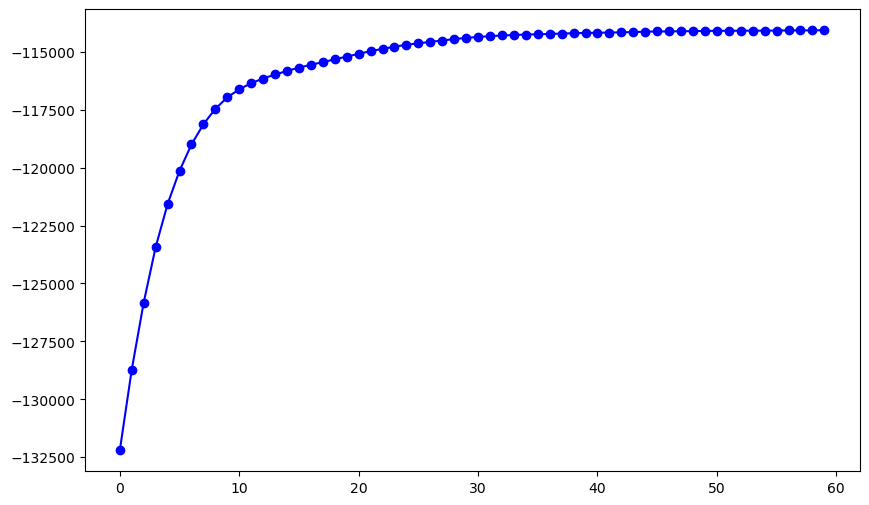

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

In [10]:
# Assuming 'Y' is the numpy array with your imputed data
# Also assuming 'original_values' is the original DataFrame before you removed 20% of the data
Y= mycebmf.Y_fit
# Extract the original values that were removed (same as before)
true_values = original_values.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Extract the corresponding imputed values from Y
imputed_values = Y[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Check if their shapes match
print(f"True values shape: {true_values.shape}")
print(f"Imputed values shape: {imputed_values.shape}")

# Calculate RMSE if shapes match
if true_values.shape == imputed_values.shape:
    rmse = np.sqrt(mean_squared_error(true_values, imputed_values))
    print(f'RMSE for your custom imputation method: {rmse}')
else:
    print("Error: Shape mismatch between true values and imputed values.")


True values shape: (20000,)
Imputed values shape: (20000,)
RMSE for your custom imputation method: 0.9268473434599347


In [11]:
mycebmf.iter()

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\cEBMF.py:327: RuntimeWarning: divide by zero encountered in power
  s_f = (denominator_f_hat) ** (-0.5)+1e-6


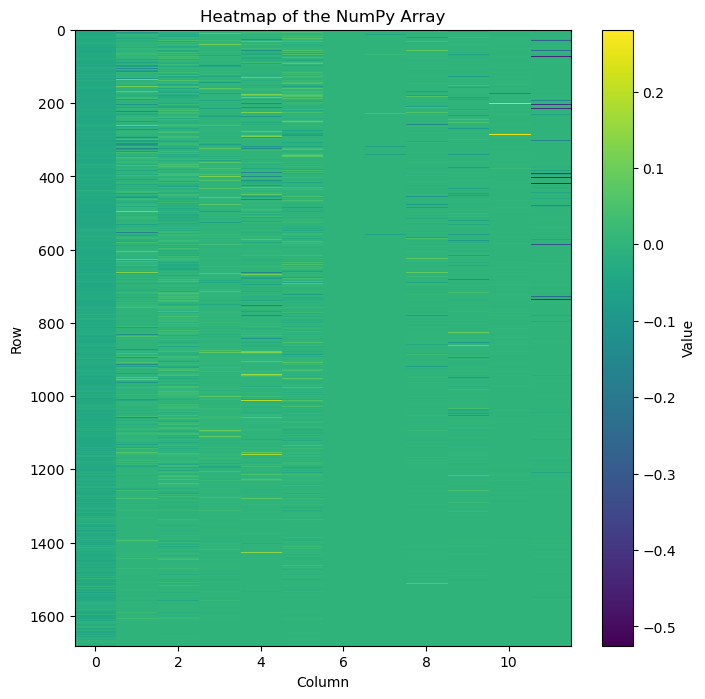

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming mycebmf.f is your NumPy array
plt.figure(figsize=(8, 8))  # You can adjust the size here
plt.imshow(mycebmf.F, cmap='viridis', aspect='auto', interpolation='nearest')  # 'aspect' set to auto for better scaling
plt.colorbar(label="Value")
plt.title("Heatmap of the NumPy Array")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()


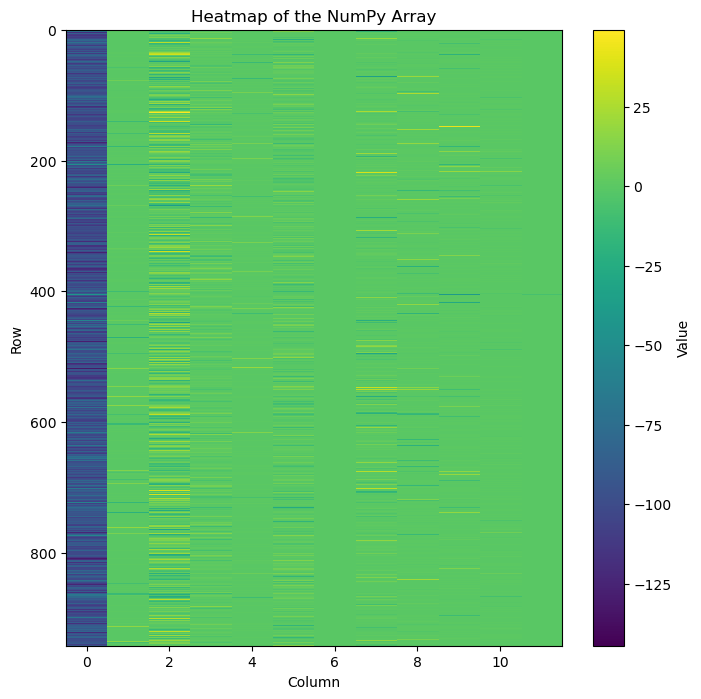

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming mycebmf.f is your NumPy array
plt.figure(figsize=(8, 8))  # You can adjust the size here
plt.imshow(mycebmf.L, cmap='viridis', aspect='auto', interpolation='nearest')  # 'aspect' set to auto for better scaling
plt.colorbar(label="Value")
plt.title("Heatmap of the NumPy Array")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()


NameError: name 'sigmaamax' is not defined